In [ ]:
import pandas as pd
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cdist
import numpy as np
from scipy.spatial.distance import euclidean

In [ ]:
# Read the dataset
df_2011 = pd.read_csv('drive/MyDrive/turbine/gt_2011.csv')
df_2012 = pd.read_csv('drive/MyDrive/turbine/gt_2012.csv')
df_2013 = pd.read_csv('drive/MyDrive/turbine/gt_2013.csv')
df_2014 = pd.read_csv('drive/MyDrive/turbine/gt_2014.csv')
df_2015 = pd.read_csv('drive/MyDrive/turbine/gt_2015.csv')

# get info about the dataset
print("2011")
print(df_2011.info())

print("2012")
print(df_2012.info())

print("2013")
print(df_2013.info())

print("2014")
print(df_2014.info())

print("2015")
print(df_2015.info())


2011
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7411 entries, 0 to 7410
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      7411 non-null   float64
 1   AP      7411 non-null   float64
 2   AH      7411 non-null   float64
 3   AFDP    7411 non-null   float64
 4   GTEP    7411 non-null   float64
 5   TIT     7411 non-null   float64
 6   TAT     7411 non-null   float64
 7   TEY     7411 non-null   float64
 8   CDP     7411 non-null   float64
 9   CO      7411 non-null   float64
 10  NOX     7411 non-null   float64
dtypes: float64(11)
memory usage: 637.0 KB
None
2012
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7628 entries, 0 to 7627
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      7628 non-null   float64
 1   AP      7628 non-null   float64
 2   AH      7628 non-null   float64
 3   AFDP    7628 non-null   float64
 4   GTEP    7628 non-nul

In [ ]:
# merge the dataset
df = pd.concat([df_2011, df_2012, df_2013, df_2014, df_2015], ignore_index=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36733 entries, 0 to 36732
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      36733 non-null  float64
 1   AP      36733 non-null  float64
 2   AH      36733 non-null  float64
 3   AFDP    36733 non-null  float64
 4   GTEP    36733 non-null  float64
 5   TIT     36733 non-null  float64
 6   TAT     36733 non-null  float64
 7   TEY     36733 non-null  float64
 8   CDP     36733 non-null  float64
 9   CO      36733 non-null  float64
 10  NOX     36733 non-null  float64
dtypes: float64(11)
memory usage: 3.1 MB
None


In [ ]:
df.describe()

AT            AP            AH          AFDP          GTEP  \
count  36733.000000  36733.000000  36733.000000  36733.000000  36733.000000   
mean      17.712726   1013.070165     77.867015      3.925518     25.563801   
std        7.447451      6.463346     14.461355      0.773936      4.195957   
min       -6.234800    985.850000     24.085000      2.087400     17.698000   
25%       11.781000   1008.800000     68.188000      3.355600     23.129000   
50%       17.801000   1012.600000     80.470000      3.937700     25.104000   
75%       23.665000   1017.000000     89.376000      4.376900     29.061000   
max       37.103000   1036.600000    100.200000      7.610600     40.716000   

                TIT           TAT           TEY           CDP            CO  \
count  36733.000000  36733.000000  36733.000000  36733.000000  36733.000000   
mean    1081.428084    546.158517    133.506404     12.060525      2.372468   
std       17.536373      6.842360     15.618634      1.088795      2.262672   
min     1000.800000    511.040000    100.020000      9.851800      0.000388   
25%     1071.800000    544.720000    124.450000     11.435000      1.182400   
50%     1085.900000    549.880000    133.730000     11.965000      1.713500   
75%     1097.000000    550.040000    144.080000     12.855000      2.842900   
max     1100.900000    550.610000    179.500000     15.159000     44.103000   

                NOX  
count  36733.000000  
mean      65.293067  
std       11.678357  
min       25.905000  
25%       57.162000  
50%       63.849000  
75%       71.548000  
max      119.910000

In [ ]:
df.var()

AT       55.464530
AP       41.774841
AH      209.130787
AFDP      0.598976
GTEP     17.606059
TIT     307.524376
TAT      46.817896
TEY     243.941740
CDP       1.185475
CO        5.119683
NOX     136.384028
dtype: float64

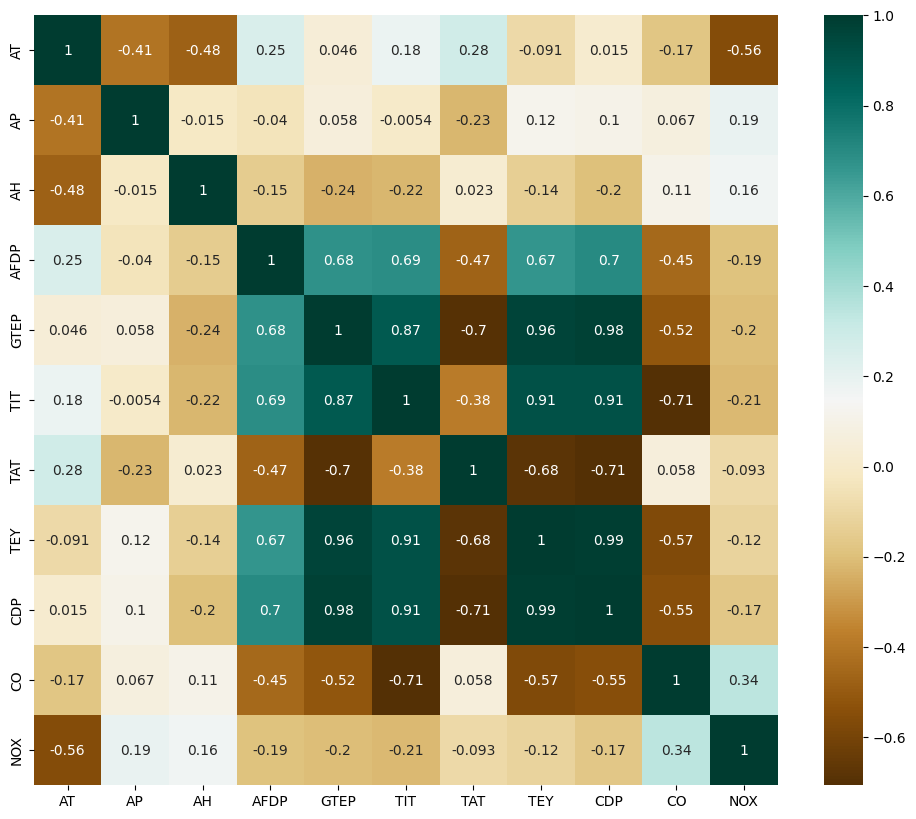

In [ ]:
# draw correlation matrix
corr = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='BrBG')
plt.show()

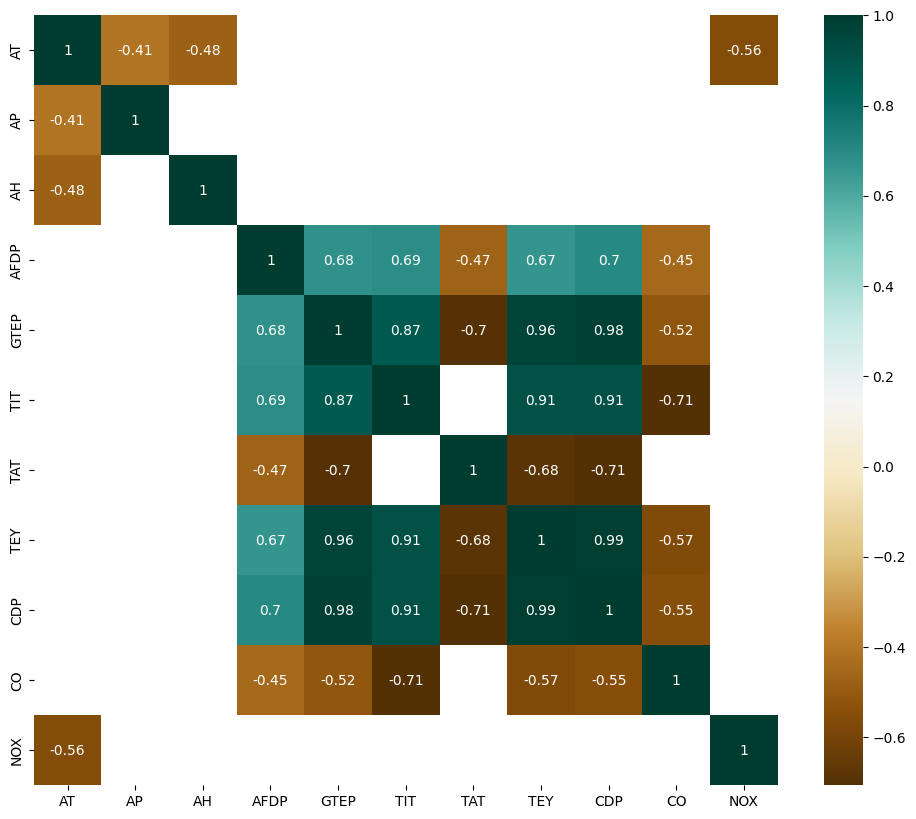

In [ ]:
# show only the correlation of features with correlation > 0.5
corr = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], annot=True, cmap='BrBG')
plt.show()

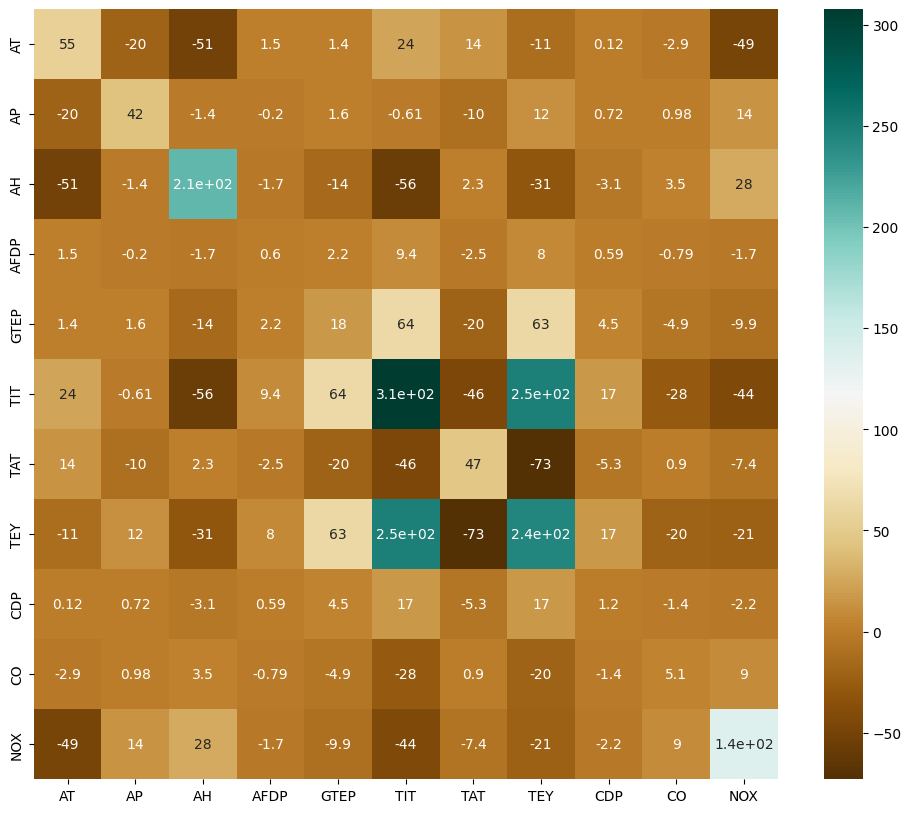

In [ ]:
# draw covariance matrix
cov = df.cov()
plt.figure(figsize=(12, 10))
sns.heatmap(cov, annot=True, cmap='BrBG')
plt.show()

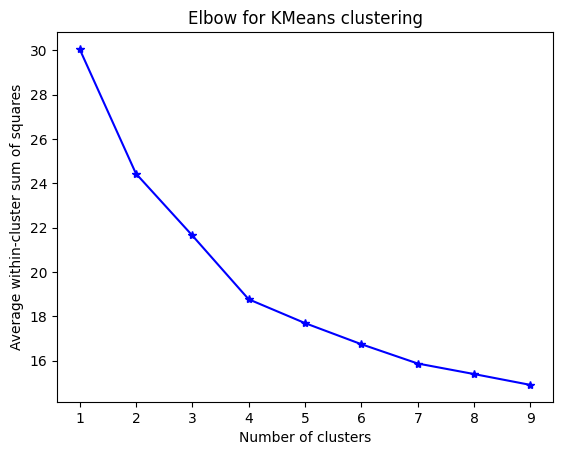

In [ ]:
# create and plot multiple k-means models and plot
# find the optimal number of clusters
kMeans_models = [KMeans(n_clusters=k,n_init=1).fit(df) for k in range(1, 10)]
centroids = [model.cluster_centers_ for model in kMeans_models]

D_k = [cdist(df, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D, axis=1) for D in D_k]
dist = [np.min(D, axis=1) for D in D_k]
avgWithinSS = [sum(d)/df.shape[0] for d in dist]

plt.plot(range(1, 10), avgWithinSS, 'b*-')
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow for KMeans clustering')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


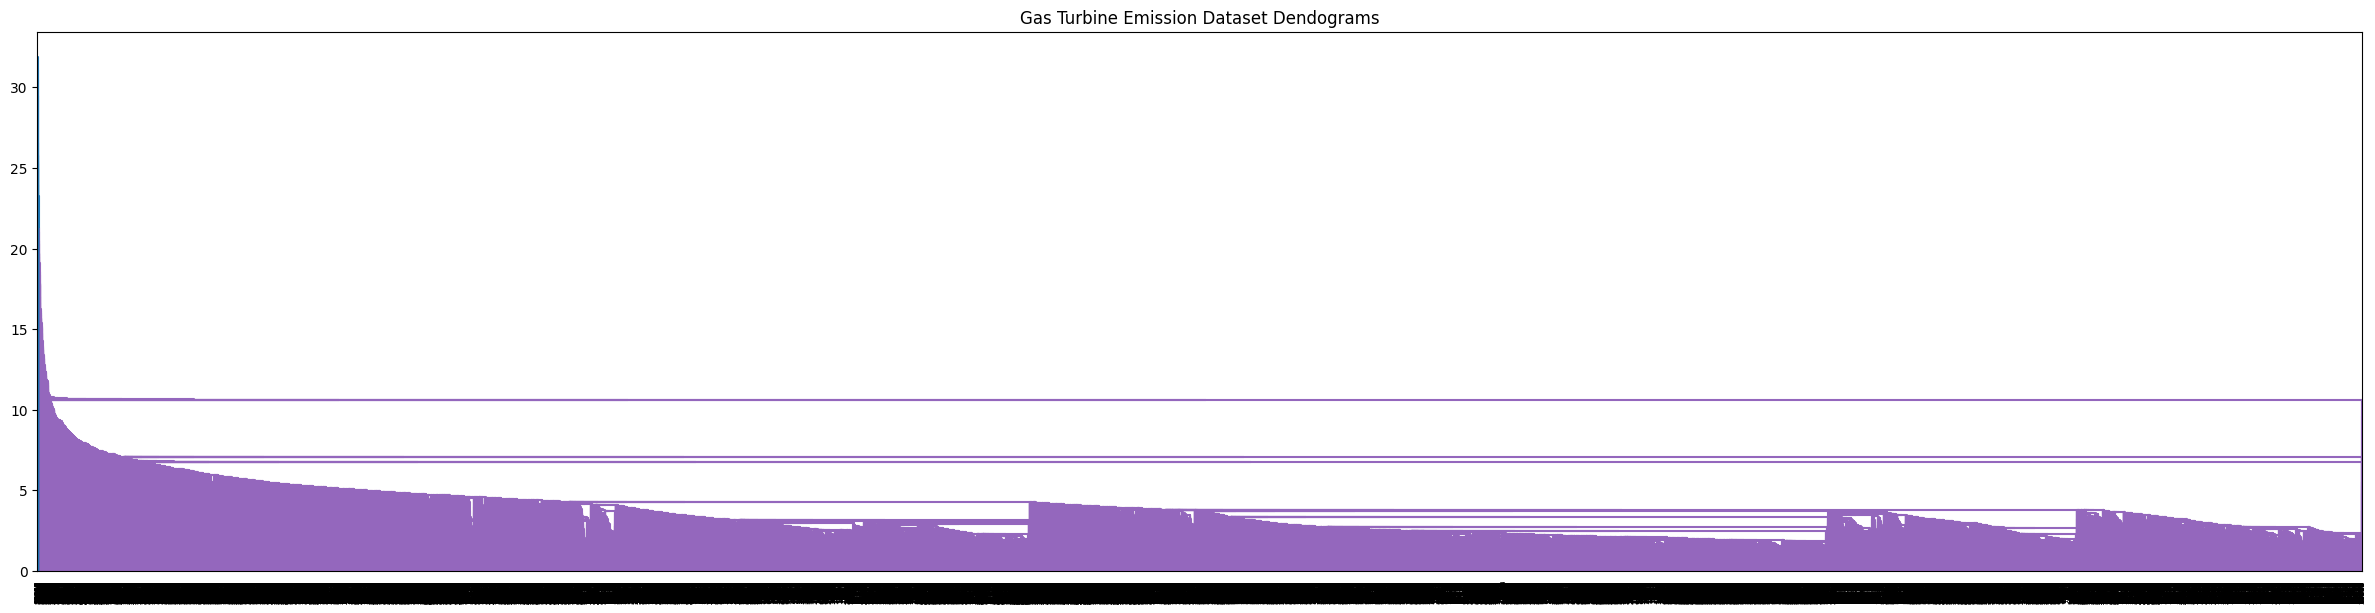

In [ ]:
# apply ahc
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')
cluster.fit_predict(df)

# plot the dendrogram
plt.figure(figsize=(30, 7))
plt.title("Gas Turbine Emission Dataset Dendograms")
dend = shc.dendrogram(shc.linkage(df, method='single'))
plt.show()

RecursionError: ignored

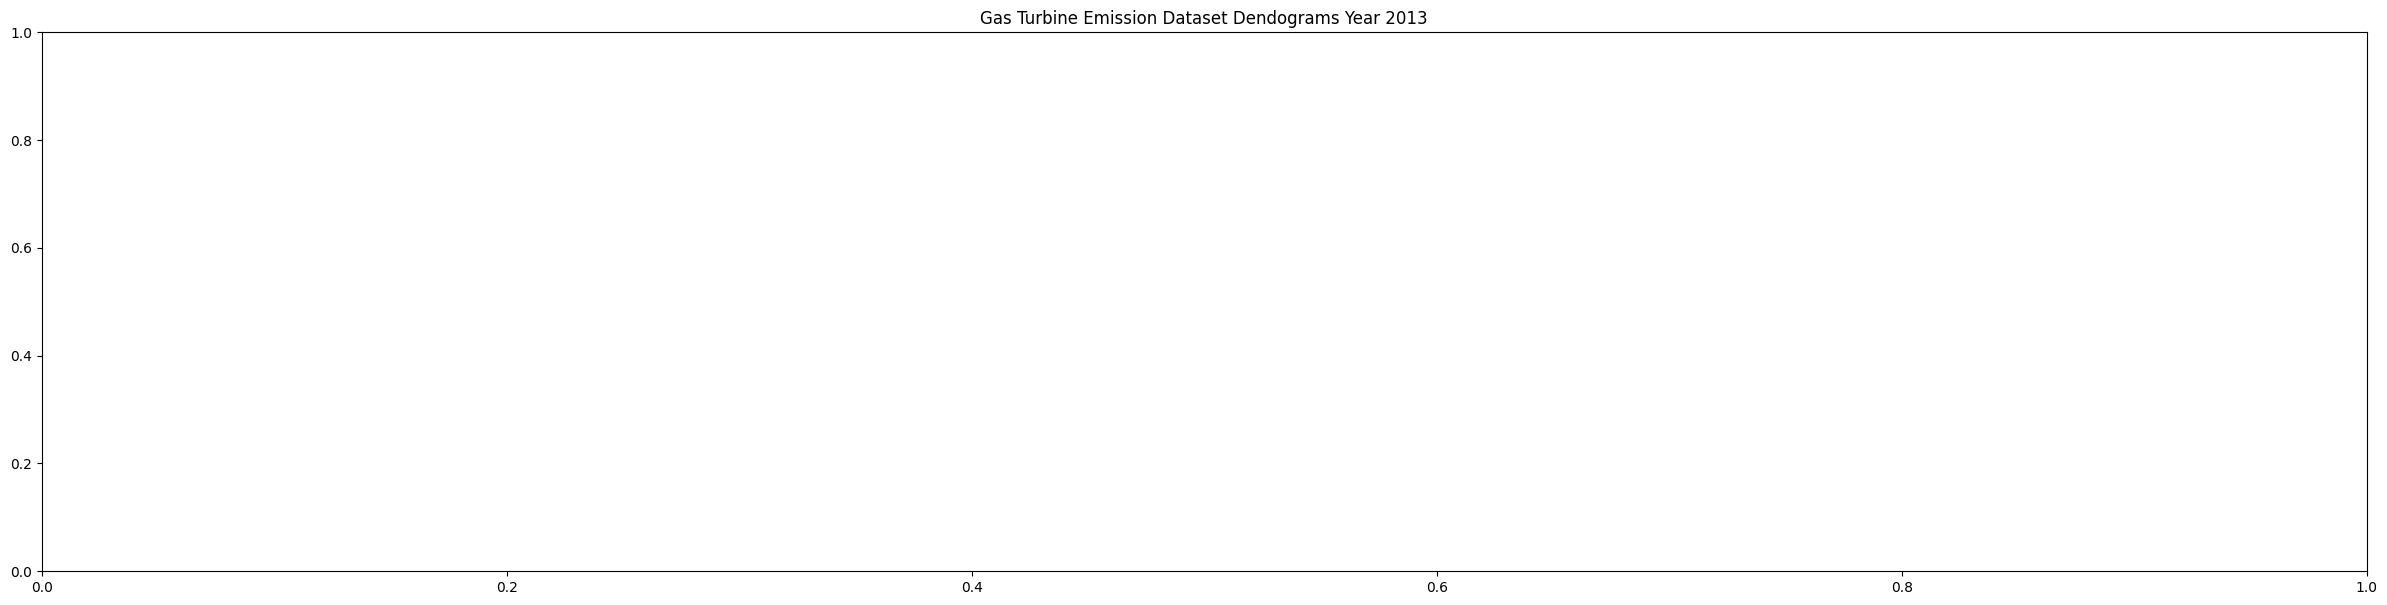

In [ ]:
# apply ahc
cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='single')
cluster.fit_predict(df_2012)

# plot the dendrogram
plt.figure(figsize=(30, 7))
plt.title("Gas Turbine Emission Dataset Dendograms Year 2013")
dend = shc.dendrogram(shc.linkage(df_2012, method='single'))
plt.show()

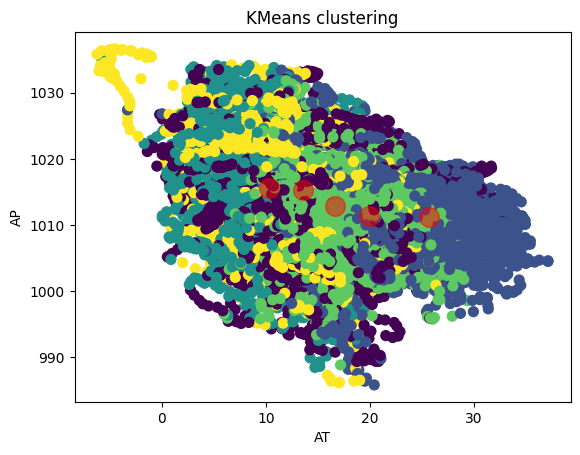

In [ ]:
# create and plot multiple k-means models and plot
# visualize the result
kmeans = KMeans(n_clusters=5, n_init=1)
kmeans.fit(df)

plt.scatter(df['AT'], df['AP'], c=kmeans.predict(df), s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.xlabel('AT')
plt.ylabel('AP')
plt.title('KMeans clustering')
plt.show()

In [ ]:
# separate the clusters then put them in a list
def separate_clusters(df, preds, n_clusters):
    clusters = []
    for i in range(n_clusters):
        cluster = df[preds == i]
        cluster = cluster.values.tolist()
        clusters.append(cluster)
    return clusters

In [ ]:
def inter_cluster_distance(cluster1, cluster2):
    distances = []
    for i in range(len(cluster1)):
        for j in range(len(cluster2)):
            distances.append(euclidean(cluster1[i], cluster2[j]))
    return np.mean(distances)

def intra_cluster_distance(cluster):
    distances = []
    for i in range(len(cluster)):
        for j in range(len(cluster)):
            if i != j:
                distances.append(euclidean(cluster[i], cluster[j]))
    return np.mean(distances)

def calculate_DI(clusters):
    inter_distances = []
    intra_distances = []
    for i in range(len(clusters)):
        for j in range(len(clusters)):
            if i != j:
                inter_distances.append(inter_cluster_distance(clusters[i], clusters[j]))
        intra_distances.append(intra_cluster_distance(clusters[i]))
    return np.min(intra_distances) / np.max(inter_distances)


In [ ]:
kmeans = []
silhouette = []
davies_bouldin = []
DI = []
for i in range(2, 10):
    k = KMeans(n_clusters=i, n_init="auto")
    k.fit(df)
    kmeans.append(k)
    silhouette.append(metrics.silhouette_score(df, k.labels_, metric='euclidean'))
    davies_bouldin.append(metrics.davies_bouldin_score(df, k.labels_))
    clusters = separate_clusters(df, k.labels_, i)
    DI.append(calculate_DI(clusters))

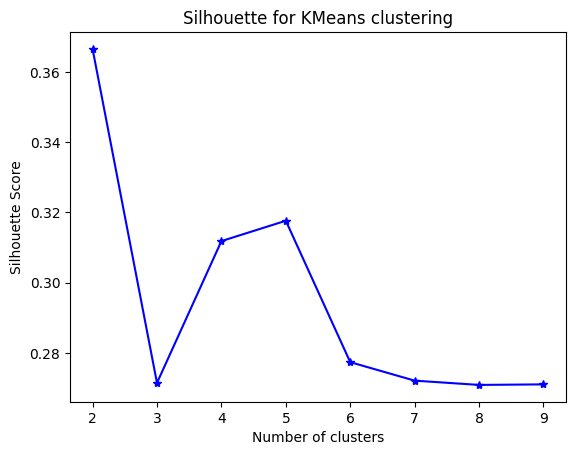

In [ ]:
plt.plot(range(2, 10), silhouette, 'b*-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette for KMeans clustering')
plt.show()

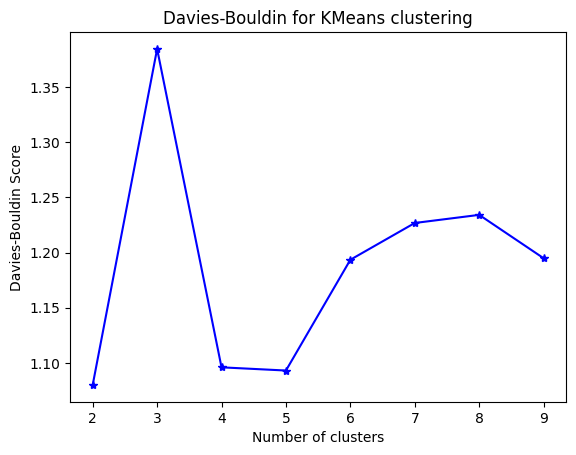

In [ ]:
plt.plot(range(2, 10), davies_bouldin, 'b*-')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin Score')
plt.title('Davies-Bouldin for KMeans clustering')
plt.show()

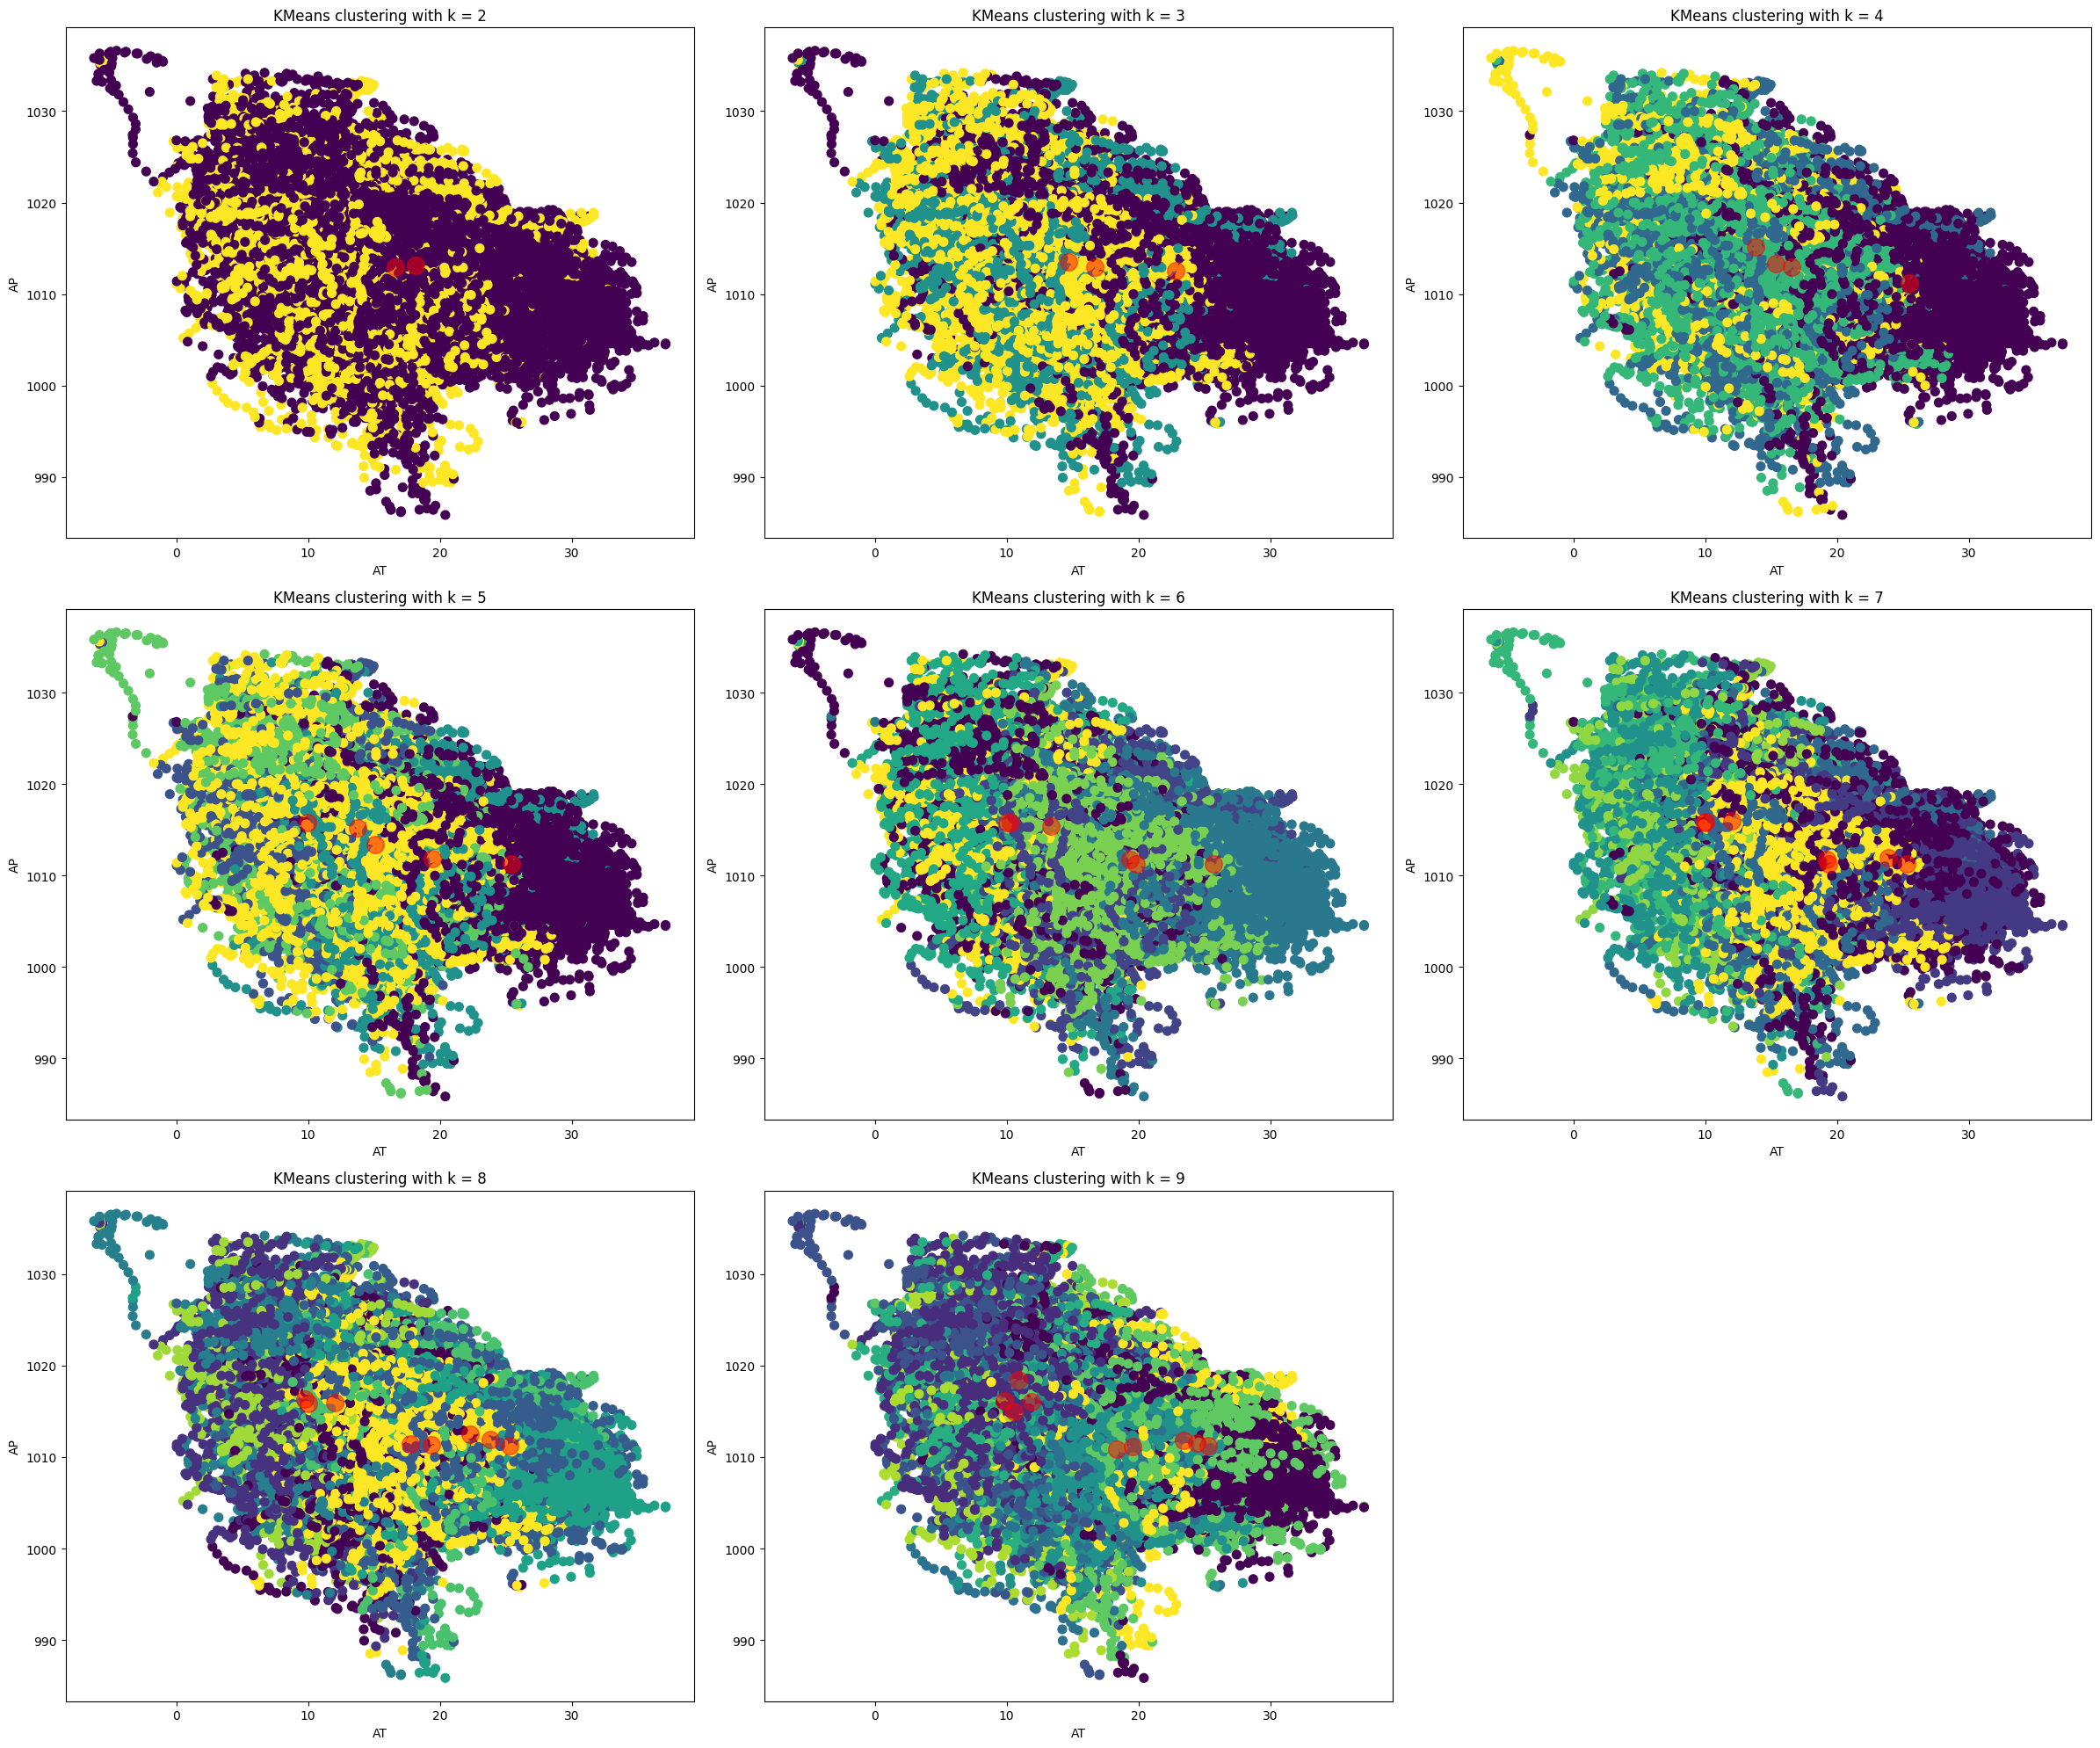

In [ ]:
plt.figure(figsize=((24, 20)))
for i in range(len(kmeans)):
    plt.subplot(3, 3, i+1)
    plt.scatter(df['AT'], df['AP'], c=kmeans[i].predict(df), s=50, cmap='viridis')
    centers = kmeans[i].cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
    plt.xlabel('AT')
    plt.ylabel('AP')
    plt.title('KMeans clustering with k = ' + str(i+2))
    plt.tight_layout()
plt.show()

In [ ]:
# apply PCA
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2', 'PC3', 'PC4'])
print(principalDf.info())

print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36733 entries, 0 to 36732
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     36733 non-null  float64
 1   PC2     36733 non-null  float64
 2   PC3     36733 non-null  float64
 3   PC4     36733 non-null  float64
dtypes: float64(4)
memory usage: 1.1 MB
None
[0.54285619 0.21720478 0.13215557 0.05557157]
0.9477881004626529


In [ ]:
# Apply pca
kmeans_pca = []
silhouette_pca = []
davies_bouldin_pca = []
for i in range(2, 10):
    k = KMeans(n_clusters=i, n_init="auto")
    k.fit(principalDf)
    kmeans_pca.append(k)
    silhouette_pca.append(metrics.silhouette_score(principalDf, k.labels_, metric='euclidean'))
    davies_bouldin_pca.append(metrics.davies_bouldin_score(principalDf, k.labels_))



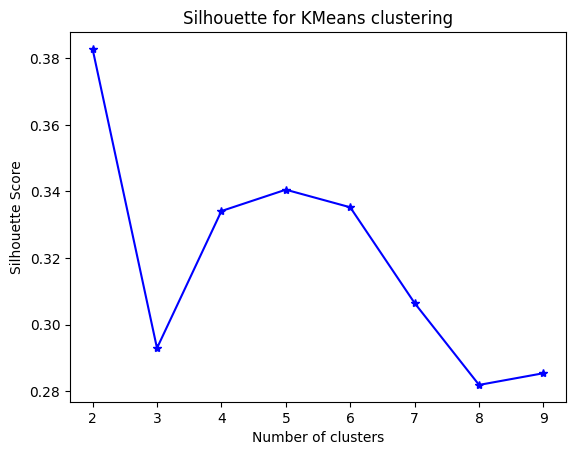

In [ ]:
plt.plot(range(2, 10), silhouette_pca, 'b*-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette for KMeans clustering')
plt.show()

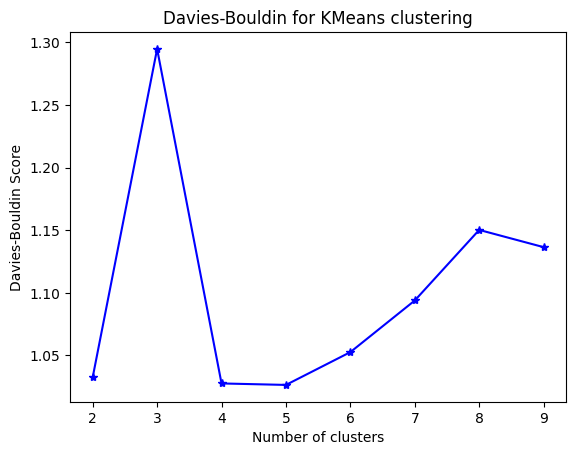

In [ ]:

plt.plot(range(2, 10), davies_bouldin_pca, 'b*-')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin Score')
plt.title('Davies-Bouldin for KMeans clustering')
plt.show()


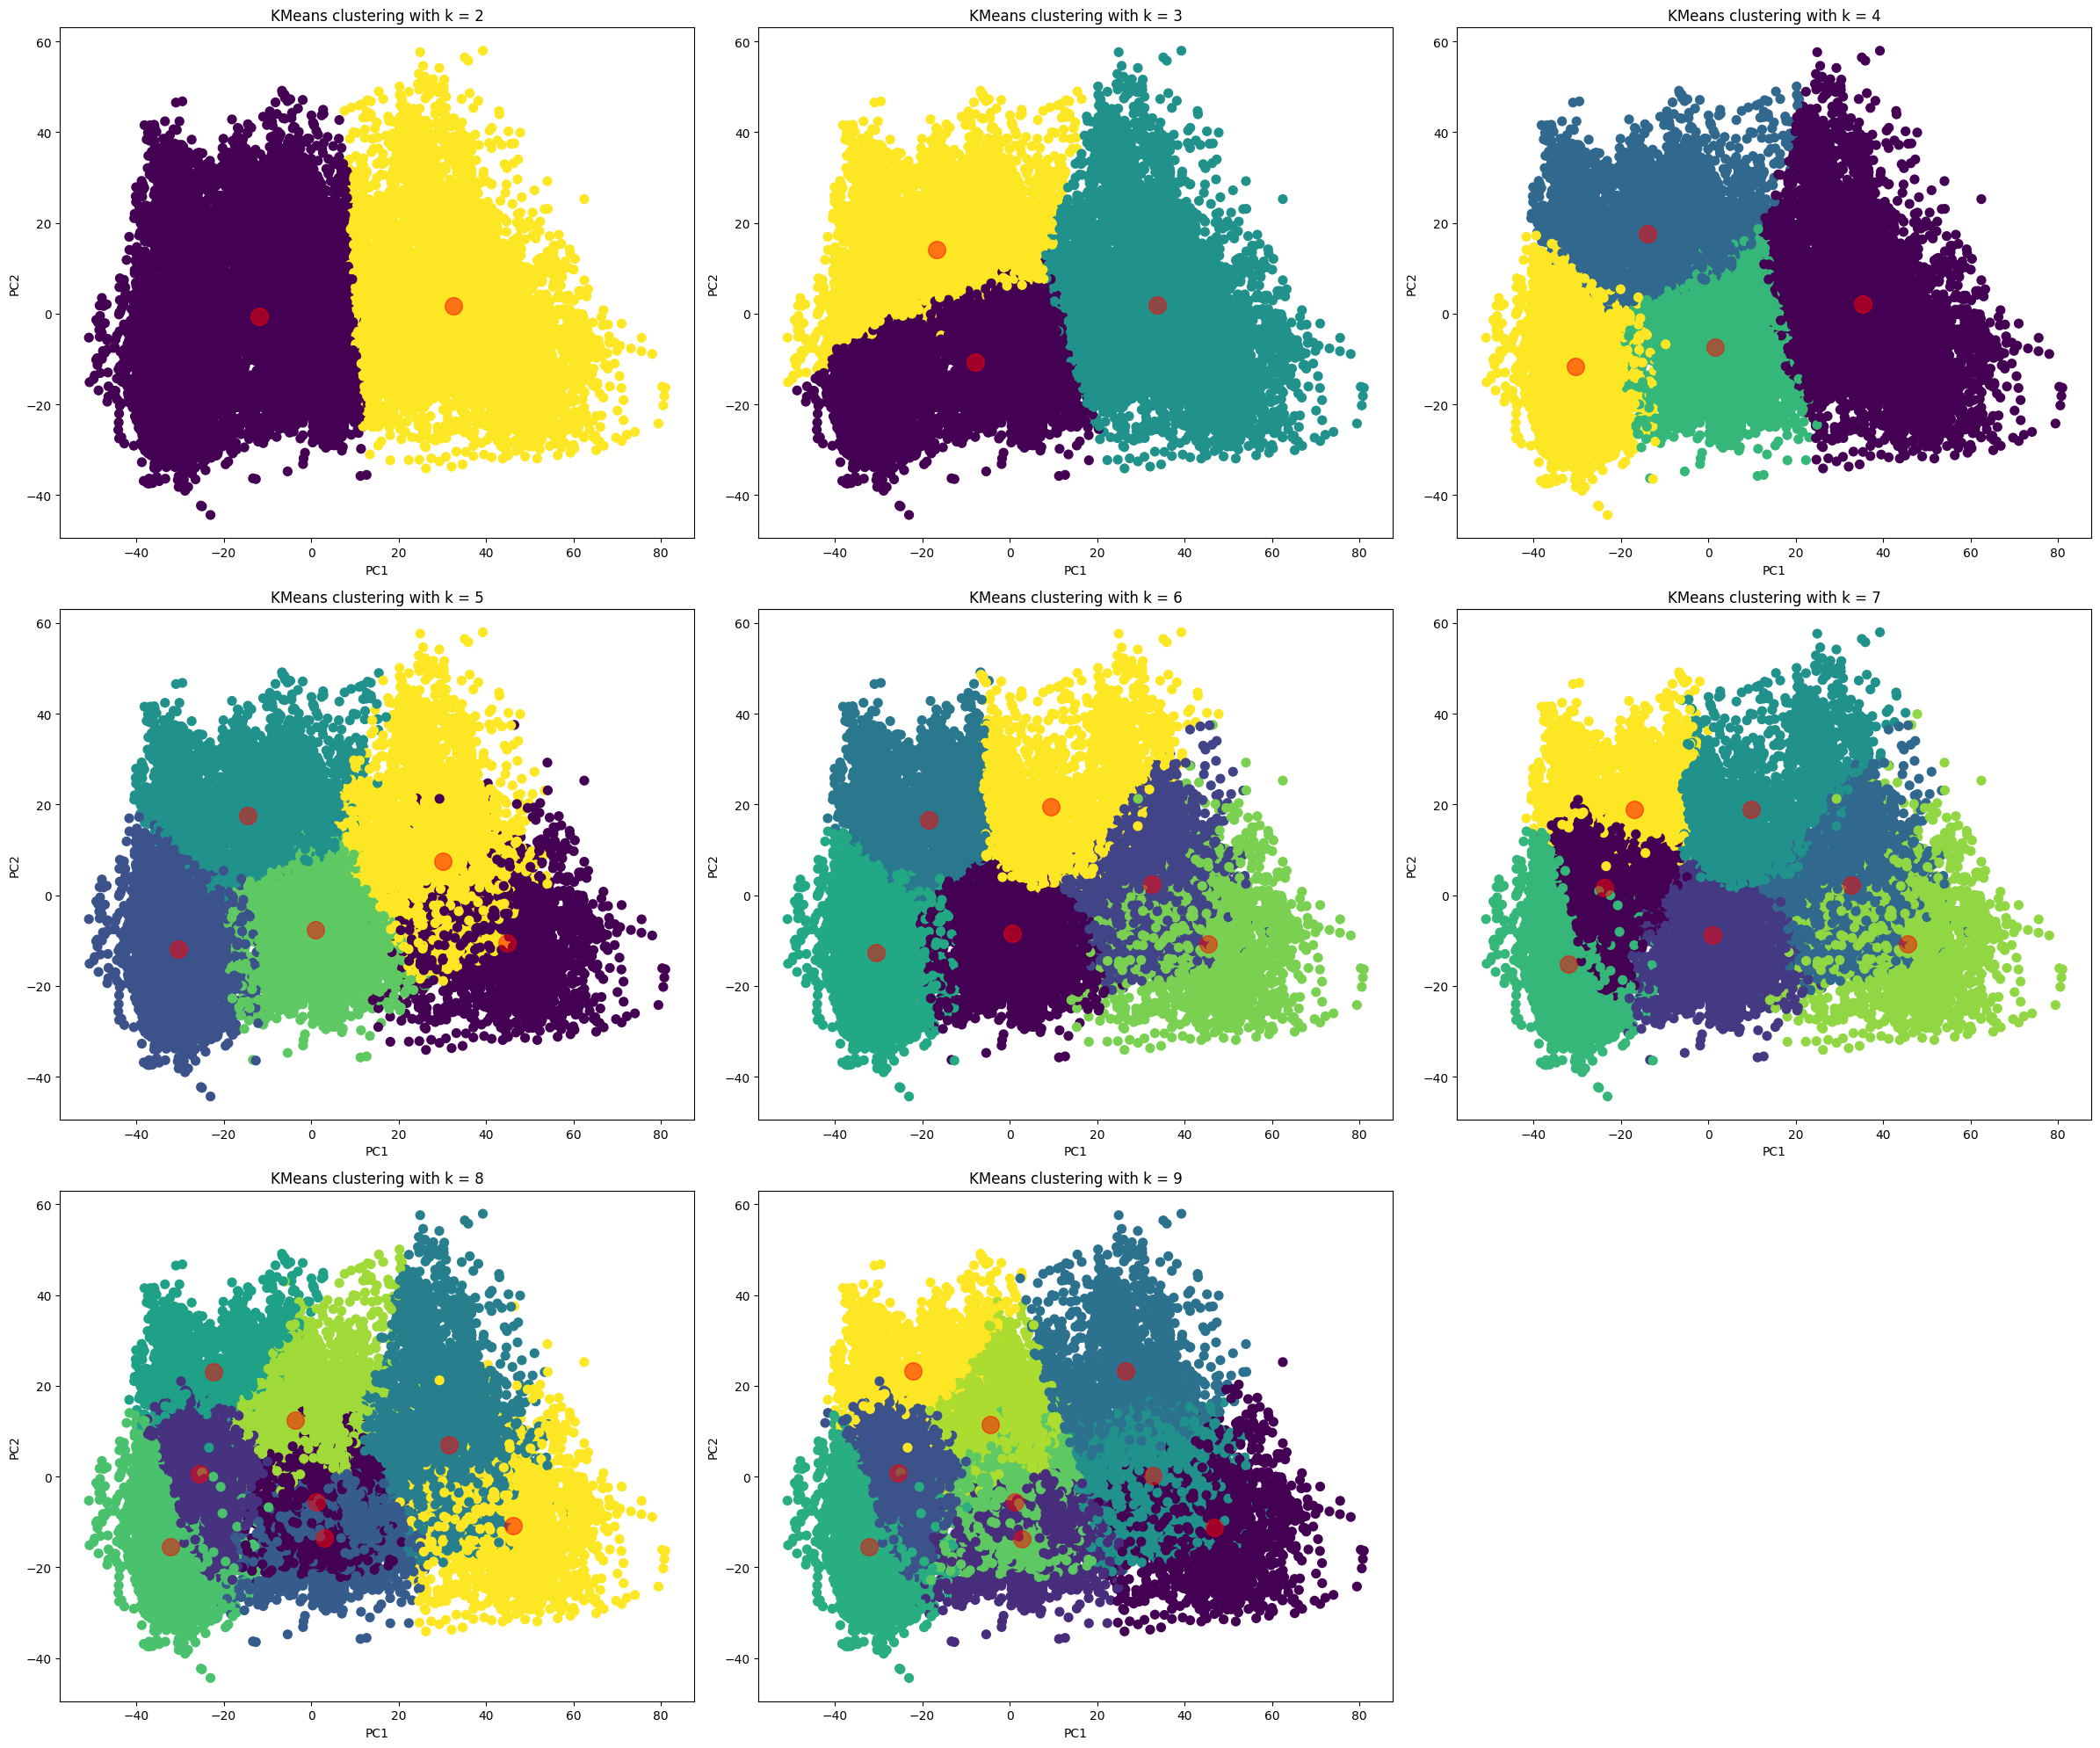

In [ ]:
plt.figure(figsize=((24, 20)))
for i in range(len(kmeans_pca)):
    plt.subplot(3, 3, i+1)
    plt.scatter(principalDf['PC1'], principalDf['PC2'], c=kmeans_pca[i].predict(principalDf), s=50, cmap='viridis')
    centers = kmeans_pca[i].cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('KMeans clustering with k = ' + str(i+2))
    plt.tight_layout()
plt.show()